In [ ]:
try:
  import google.colab
  COLAB=True
except:
  COLAB=False

In [ ]:
if COLAB:
  !pip -q install "gymnasium[classic-control, atari, accept-rom-license]" #what is that
  !pip -q install piglet
  !pip -q install imageio_ffmpeg
  !pip -q install moviepy==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 14.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.6 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(3) #ehat

env=gym.make('Taxi-v3')

state, info=env.reset()
print(f'state: {state}')


next_state,r,terminated,truncated,info = env.step(0)
env.close()

state: 123


In [ ]:
#info

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


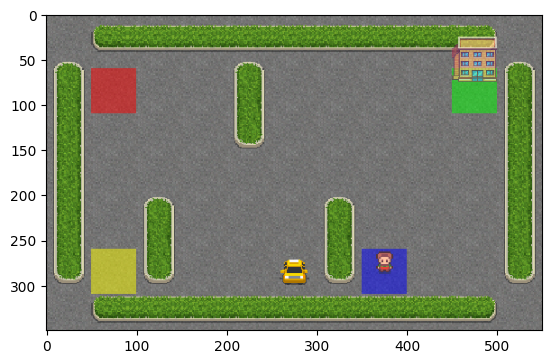

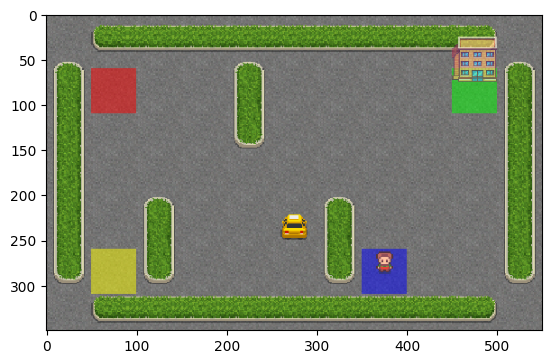

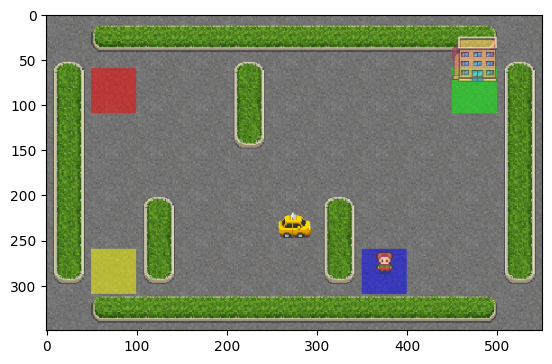

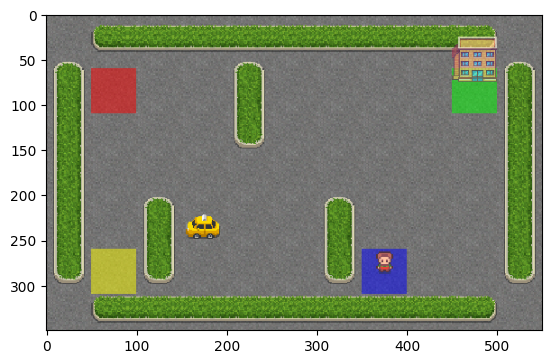

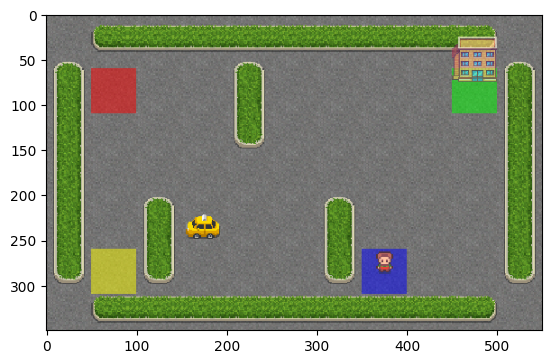

In [ ]:
env= gym.make('Taxi-v3', render_mode='rgb_array')
env.reset()

kk=[0,1,2,3,4]
for i in range(5):
  env.step(kk[i])
  plt.imshow(env.render() )
  plt.show()


In [ ]:
from gymnasium.wrappers.record_video import RecordVideo

env=gym.make('Taxi-v3', render_mode='rgb_array', max_episode_steps=250)

env=RecordVideo(env, './video')

s,_=env.reset()
done=False

#while not done:
#  random_act=env.action_space.sample()
#  s, r, terminated, truncated, _ = env.step(random_act)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:297: UserWarning: WARN: env.is_vector_env to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_vector_env` for environment variables or `env.get_attr('is_vector_env')` that will search the reminding wrappers.
  logger.warn(


In [ ]:
from IPython.display import Video

def show_video(episode:int=0):
  return display(Video(f'video/rl-video-episode-{episode}.mp4', embed=True))

#show_video()

In [ ]:
env.close()

Moviepy - Building video /content/video/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-0.mp4


In [ ]:
env=gym.make('Taxi-v3', render_mode='rgb_array')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Q-learning

In [ ]:
import numpy as np

In [ ]:
def run_episode_for_recording(eps, Q):
  env=gym.make('Taxi-v3', render_mode='rgb_array', max_episode_steps=250)
  env=RecordVideo(env, './video')
  s,_=env.reset()
  done=False

  s, info =env.reset()
  terminated=False
  truncated=False
  timestamp=0 # number of actions
  action=1
  states, actions, rewards= [],[],[] #вроде как просто для хранения
  action=select_action(s, Q, eps)

  while timestamp<200 and terminated==False and truncated==False:
    #сейчас не задае action
    #йечас непонятно откуда брать q_values
    s_new, r, terminated, truncated,_=env.step(action)
    #
    states.append(s), actions.append(action), rewards.append(r)
    Q=q_learning_update(s,action,r,s_new)
    action_new=select_action(s,Q,eps)

    s,action=s_new, action_new
    timestamp+=1



In [ ]:
from IPython.core.inputtransformer2 import TransformerManager

def run_episode(eps, Q):
  s, info =env.reset()
  terminated=False
  truncated=False
  timestamp=0 # number of actions
  action=1
  states, actions, rewards= [],[],[] #вроде как просто для хранения
  action=select_action(s, Q, eps)

  while timestamp<200 and terminated==False and truncated==False:
    #сейчас не задае action
    #йечас непонятно откуда брать q_values
    s_new, r, terminated, truncated,_=env.step(action)
    #
    states.append(s), actions.append(action), rewards.append(r)
    Q=q_learning_update(s,action,r,s_new)
    action_new=select_action(s,Q,eps)

    s,action=s_new, action_new
    timestamp+=1

  #print(rewards)

  return timestamp, states, actions, rewards, Q

#переписать фукнцию чтобы она ранила, а не обучала
def evaluate(n_eval_episodes, Q, gamma=0.1):
  _,_,_, rewards,_=run_episode(eps=0.0, Q=Q)
  #print('eval', rewards)
  returns=returns_from_rewards(rewards)
  return returns

def select_action(s, Q, eps):
  if np.random.random()<eps:
    action=env.action_space.sample()
  else:
    action=np.argmax(Q[s])

  return action

def q_learning_update(s, a, r, s_next, lr=0.9, gamma=0.1):
  Q_sa=Q[s, a]

  Q_sn=np.max(Q[s_next,:])
  #print('Q_sn',Q_sn)
  #print('r',r)
  target=r+gamma*Q_sn
  #print('target',target)
  td_error= Q_sa-target
  #print(td_error)
  Q[s,a]=Q_sa-td_error*lr
  #print(np.sum(Q))

  if np.sum(np.isnan(Q))>0:
    print('Q is nan')

  return Q

def returns_from_rewards(rewards, gamma=0.1):
  ret=0
  for r_i in rewards:
    ret=r_i+gamma*ret

  return ret



In [ ]:
eps=0.3
episode_number=2000
n_eval_episodes=1
mean_eval_returns=[]
Q_list=[]

Q=np.zeros((int(env.observation_space.n), int(env.action_space.n)))

for episode in range(episode_number):
  _,_,_,_,Q=run_episode(eps, Q)
  Q_list.append(Q.copy())


  if episode % 10 ==0: #we update value every 5 episodes
    print(episode)
    mean_eval_returns.append(evaluate(n_eval_episodes,Q))
    print(np.sum(Q))
    #plt.imshow(Q)
    #plt.show()
  else:
    pass
    #mean_eval_returns.append(mean_eval_returns[-1],Q)



0
-251.848632989
10
-2814.037800017261
20
-4963.1470054985075
30
-5931.7446751923435
40
-7128.202115963501
50
-8017.2009670833595
60
-8580.608295970203
70
-8936.31009662449
80
-9124.772927191534
90
-9193.696878062114
100
-9265.852133387132
110
-9295.792783505374
120
-9326.159941535785
130
-9342.866774840993
140
-9353.42013893548
150
-9364.334311636056
160
-9387.514171114208
170
-9401.33624762389
180
-9405.93978101389
190
-9420.012301995685
200
-9430.115159392644
210
-9436.29137102233
220
-9438.92303237266
230
-9440.323556315077
240
-9443.222447228665
250
-9445.894996920408
260
-9446.742096997468
270
-9449.381631502734
280
-9453.169811103757
290
-9456.403452609036
300
-9461.267437778675
310
-9463.795340665445
320
-9464.953565962125
330
-9465.023307297262
340
-9465.299704290392
350
-9465.448140030763
360
-9466.144938436039
370
-9467.371858869494
380
-9467.5996293454
390
-9468.603952087475
400
-9469.036070165886
410
-9469.16171894998
420
-9469.283069582732
430
-9469.526403737294
440
-9469

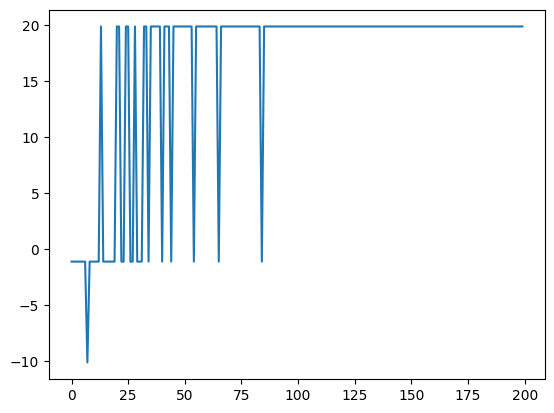

In [ ]:
plt.plot(mean_eval_returns)


In [ ]:
#хорошая функция для оценки качество эпизодов считается без гаммы
#epsilon нужно убрать в рекодинге видео

In [ ]:
run_episode_for_recording(eps, Q)
show_video()

In [ ]:
#Q=np.zeros((int(env.observation_space.n), int(env.action_space.n)))

In [ ]:
Q_list

NameError: ignored

In [ ]:
[np.mean(Q_list[i]) for i in range (len(Q_list)) ]

[-0.094091415,
 -0.19712108166666667,
 -0.28023487124529667,
 -0.3896923372452967,
 -0.4774065335785927,
 -0.5757994395115927,
 -0.6880736061778927,
 -0.777043833474556,
 -0.8468334460749194,
 -0.9468503327415495,
 -1.0400472620415495,
 -1.0788436944001163,
 -1.0879953998225043,
 -1.1891422928225042,
 -1.2926823821225042,
 -1.3800178255325042,
 -1.4606510881025043,
 -1.4911625522197747,
 -1.5313467809525567,
 -1.544150570538121,
 -1.6192544658181245,
 -1.6676503973534276,
 -1.7284590708939176,
 -1.8009742423002177,
 -1.8479820382851175,
 -1.9142764688997476,
 -1.9229347943732333,
 -1.9950555571209532,
 -2.067829880251253,
 -2.0874620258394763,
 -2.1176622035758457,
 -2.15434869676599,
 -2.165756641351593,
 -2.2386076771815926,
 -2.2633822188778807,
 -2.266171511144344,
 -2.3285530498740075,
 -2.3685518081670724,
 -2.3866414601490398,
 -2.396332730374393,
 -2.400183905052066,
 -2.41277730991738,
 -2.4610196748379156,
 -2.467378531787212,
 -2.4871613261612775,
 -2.4882427316066873,
 -2.4

#SR

In [ ]:
gamma=0.7
max_episode_steps=200000
env.close()
env=gym.make('Taxi-v3', render_mode='rgb_array', max_episode_steps=200000)
env.reset()

def onehot(value, max_value):
    vec = np.zeros(max_value)
    vec[value] = 1
    return vec


def update_w(state, r, w, lr=0.7):
  error=r-w[state]
  w[state]=w[state]+error*lr
  #print(np.mean(w))
  return w


def update_sr(experience, experience_next, M, lr=0.9, gamma=gamma):

  s,a,r=experience[0],experience[1], experience[2]
  s_next,a_next=experience_next[0],experience_next[1]


  I=onehot(s, observation_size)
  #td_error=I+gamma*onehot(s_next,observation_size) - M[a,s,:]
  td_error=I+gamma*M[a_next,s_next,:] -M[a,s,:]
  #print(I)
  #print('Ma',M[a,s,:])
  #print('td_error', np.max(td_error), np.argmax(td_error), np.sum(td_error) )

  M[a,s,:]=M[a,s,:]+ lr*td_error

  if False:
    fig,ax=plt.subplots(1,4, figsize=(20,5))
    ax[0].imshow(M[0], vmax=0.0001)
    ax[1].imshow(M[1], vmax=0.0001)
    ax[2].imshow(M[2], vmax=0.0001)
    ax[3].imshow(M[3], vmax=0.0001)
    plt.show()

  #print('M',np.sum(M))
  return M, td_error
  #неправильно обнолвяется SR matrix


def evaluate_Q(state, M, w):
  Q=np.matmul(M[:,state,:],w)

  return Q

def select_action(state, M, w,eps):

  if np.random.random()<eps:
    action=env.action_space.sample()

  else:
    Q_values=evaluate_Q(state, M, w)
    #print('Q_values', Q_values)
    action=np.argmax(Q_values)

  return action


def evaluate(n_eval_episodes, w, M,gamma=gamma):
  _,_,_, rewards,_,_,_,_=run_episode(eps=0.0, w=w, M=M)
  #print('eval', rewards)
  returns=returns_from_rewards(rewards)
  print('returns',returns)
  return returns

def returns_from_rewards(rewards, gamma=gamma):
  ret=0
  #print(rewards)
  for r_i in rewards:
    ret=r_i+gamma*ret
  return ret

#нужно написать
#нужно заменить state на s

In [ ]:
returns_from_rewards

<function __main__.returns_from_rewards(rewards, gamma=0.7)>

In [ ]:
def run_episode(eps, w, M):
  s, info =env.reset()
  terminated=False
  truncated=False
  timestamp=0 # number of actions
  action=1
  states, actions, rewards= [],[],[] #вроде как просто для хранения
  action=select_action(s, M, w, eps)
  experiences=[]

  while terminated==False and truncated==False:
    #сейчас не задае action
    #йечас непонятно откуда брать q_values
    s_new, r, terminated, truncated,_=env.step(action)

    states.append(s), actions.append(action), rewards.append(r)

    experiences.append( [s, action,s_new, r, terminated ] )

    w=update_w(s,r,w)

    if len(experiences)>1:
      M, td_error=update_sr( experiences[-2], experiences[-1], M )

    #M=update_sr(s, action, r, s_new, )

    #print('w',np.sum(w))
    #print('M run_episode',np.sum(M))
    #s,a, r, s_next, M,

    action_new=select_action(s,M,w,eps)

    s,action=s_new, action_new
    timestamp+=1

  return timestamp, states, actions, rewards, Q, td_error, w, M
  #print(rewards)




In [ ]:
eps=0.7
episode_number=1000
n_eval_episodes=1
mean_eval_returns=[]
Q_list=[]
errors=[]

Q=np.zeros((int(env.observation_space.n), int(env.action_space.n)))


action_size=int(env.action_space.n)
observation_size=int(env.observation_space.n)

w=np.zeros(observation_size) # reward_estimate vector
M=np.stack(np.identity(observation_size) for i in range(action_size))

print(w.shape)
print(M.shape)

return_list=[]
w_list=[]
w_sum_list=[]
M_list=[]
rewards_list=[]


for episode in range(episode_number):

  _, _, _, rewards, _, td_error, w, M =run_episode(eps, w, M)

  return_=returns_from_rewards(rewards)
  return_list.append(return_)
  rewards_list.append(rewards)

  w_list.append(w.copy())
  w_sum_list.append(np.sum(w))


  #Q_list.append(Q.copy())
  errors.append(np.sum(td_error))
  if np.max(w)>10:
    eps=eps**(episode_number/(episode_number-1))


  if episode % 100 ==0: #we update value every 5 episodes
    print(episode)
    mean_eval_returns.append(evaluate(n_eval_episodes,w, M))
    M_list.append(M.copy())

  else:
    pass

  if np.mean(mean_eval_returns[:5])>40:
    break
    #mean_eval_returns.append(mean_eval_returns[-1],Q)



(500,)
(6, 500, 500)
0
returns -3.3333333333333335
100
returns -3.3333333333333335
200
returns -3.333333333333332
300
returns -3.333333333333332
400
returns -3.3333333333333335
500
returns -3.333333333333332
600
returns -3.333333333333332
700
returns -3.3333333333333335
800
returns -3.3333333333333335
900
returns -3.3333333333333335


In [ ]:
#низкое значение гаммы 0.9

In [ ]:
#np.array(rewards_list)
[plt.plot(rewards_list[i]) for i in range(len(rewards_list)) ]

[[<matplotlib.lines.Line2D at 0x7a126573ca00>],

Error in callback <function flush_figures at 0x7a1402195090> (for post_execute):


KeyboardInterrupt: ignored

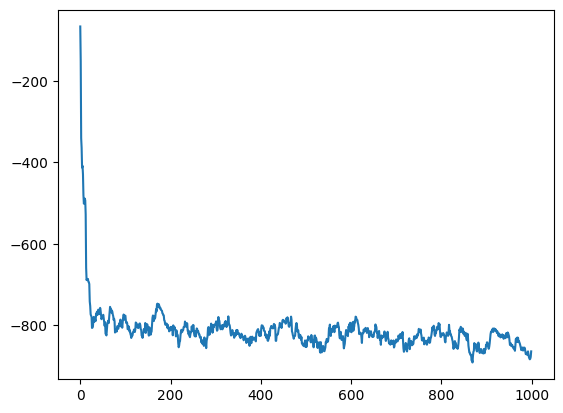

In [ ]:
#plt.plot(return_list)
plt.plot(w_sum_list)


In [ ]:
M_list=np.array(M_list)
#plt.imshow(M_list[0][i])
#np.mean(M_list,0).shape
[  np.sum(M_list[i])  for i in range(len(M_list))   ]

[3286.623494853826,
 8539.3141519533,
 8550.67663978212,
 8553.731239406565,
 8552.471358308088,
 8550.891989470201,
 8549.42767868431,
 8543.638551118585,
 8541.323838563447,
 8536.802678240496]

In [ ]:
eps

0.37907233481336344

In [ ]:
def run_episode_for_recording(eps, w, M):
#def run_episode
  env=gym.make('Taxi-v3', render_mode='rgb_array', max_episode_steps=400)
  env=RecordVideo(env, './video')
  s,_=env.reset()
  done=False

  s, info =env.reset()
  terminated=False
  truncated=False
  timestamp=0 # number of actions
  action=1
  states, actions, rewards= [],[],[] #вроде как просто для хранения
  action=select_action(s, M, w, 0)
  experiences=[]

  while timestamp<400 and terminated==False and truncated==False:
    #сейчас не задае action
    #йечас непонятно откуда брать q_values
    s_new, r, terminated, truncated,_=env.step(action)

    states.append(s), actions.append(action), rewards.append(r)

    experiences.append( [s, action,s_new, r, terminated ] )

    w=update_w(s,r,w)

    if len(experiences)>1:
      M, td_error=update_sr( experiences[-2], experiences[-1], M )

    #M=update_sr(s, action, r, s_new, )

    #print('w',np.sum(w))
    #print('M run_episode',np.sum(M))
    #s,a, r, s_next, M,

    action_new=select_action(s,M,w,eps)

    s,action=s_new, action_new
    timestamp+=1

  return timestamp, states, actions, rewards, Q, td_error, w, M



In [ ]:
timestamp_, states_, actions_, rewards_, Q_, td_error_, w_, M_=run_episode_for_recording(eps, w, M)

Moviepy - Building video /content/video/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-0.mp4


In [ ]:
print(rewards_[-1])
print(len(rewards_))

20
48


In [ ]:
show_video()

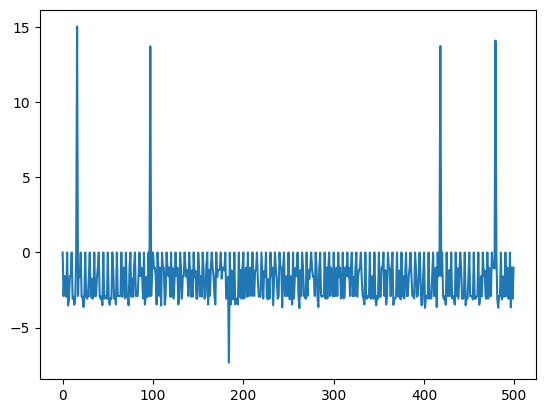

In [ ]:
plt.plot(w)

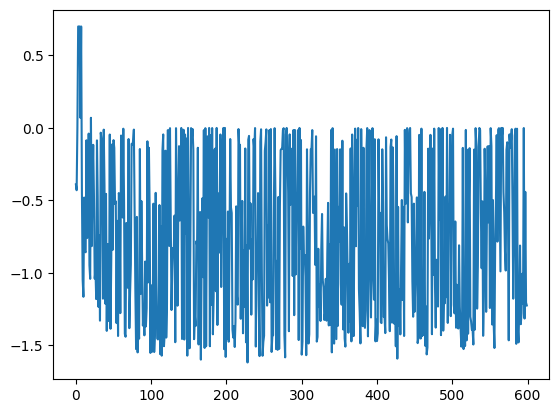

In [ ]:
plt.plot(errors)

In [ ]:
#M_list

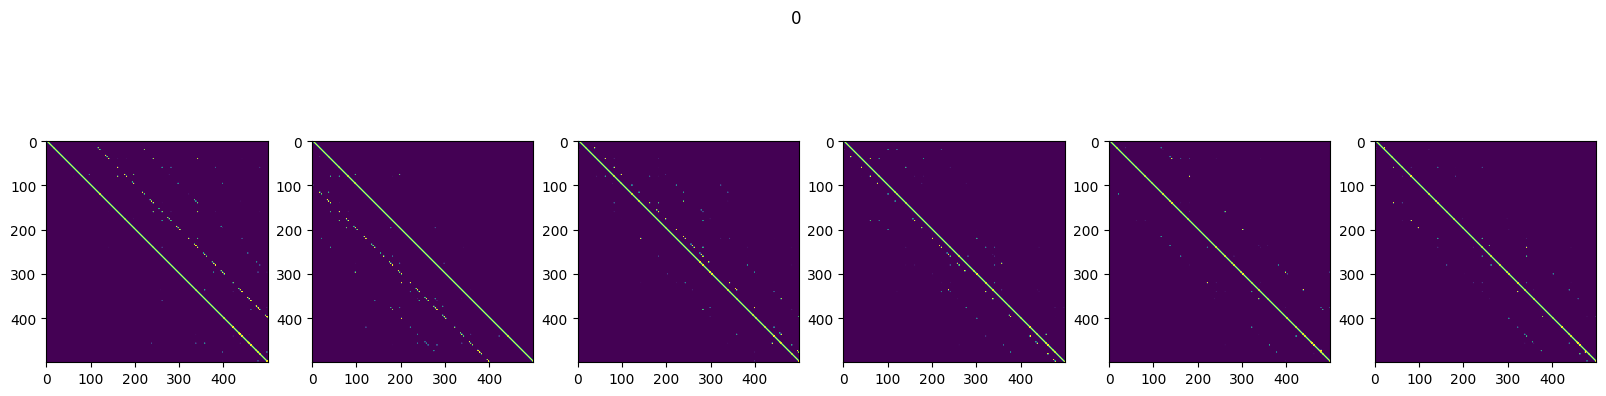

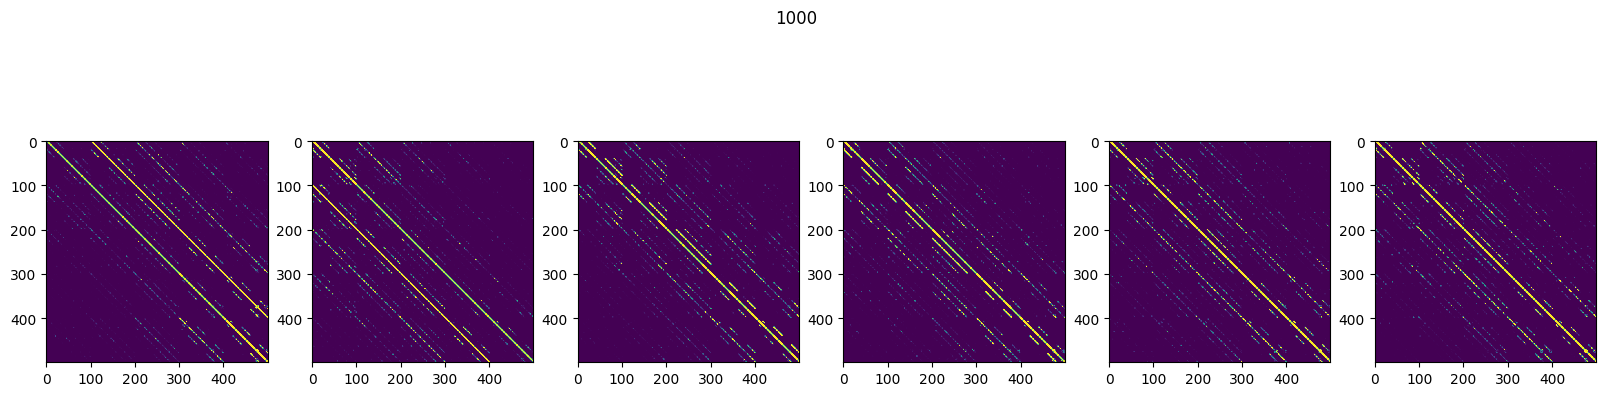

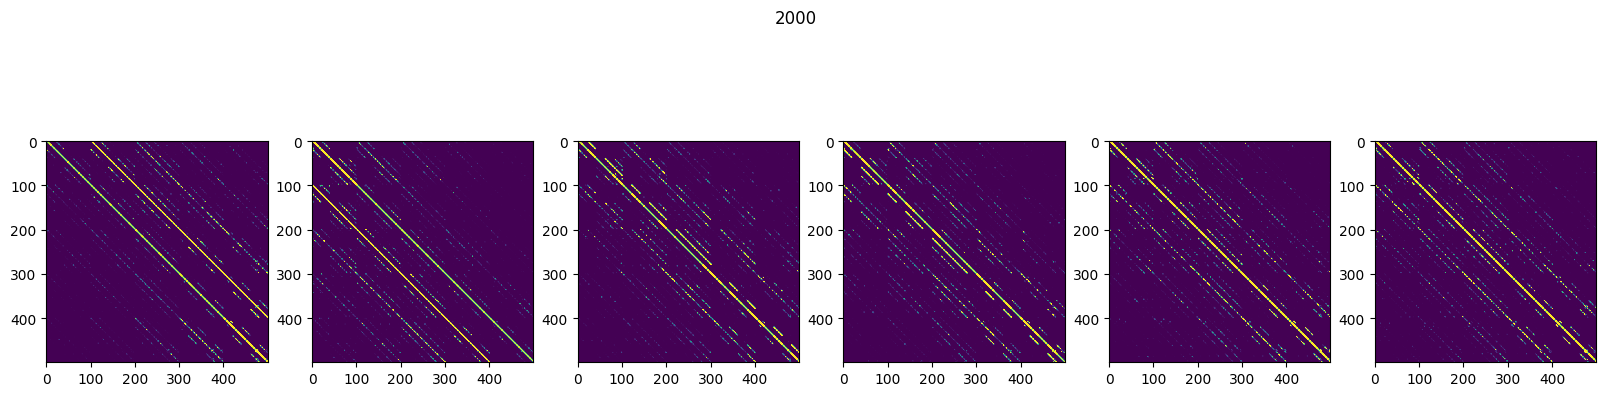

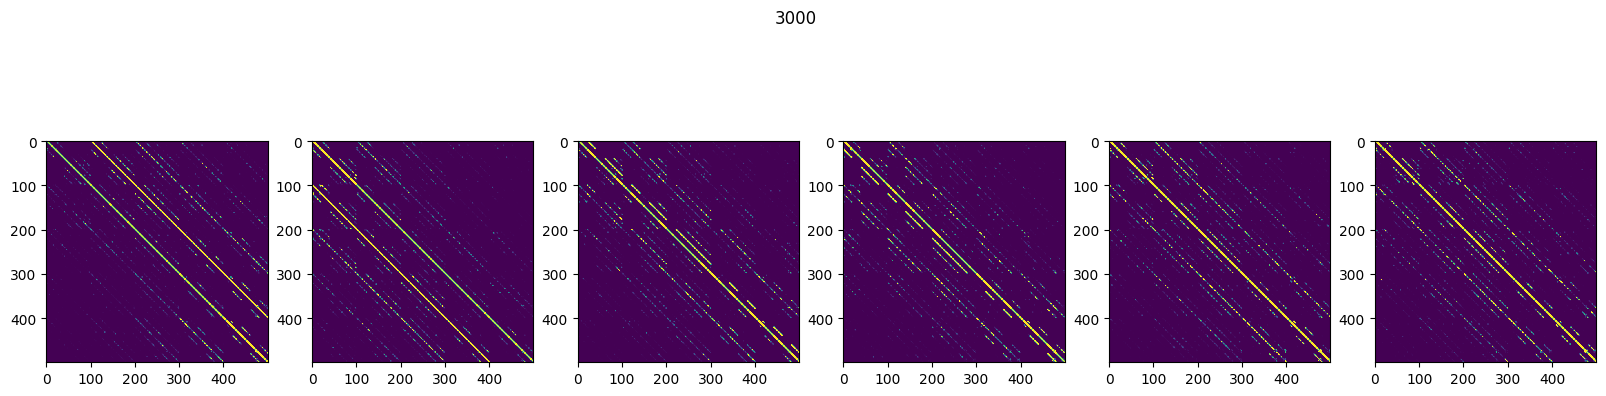

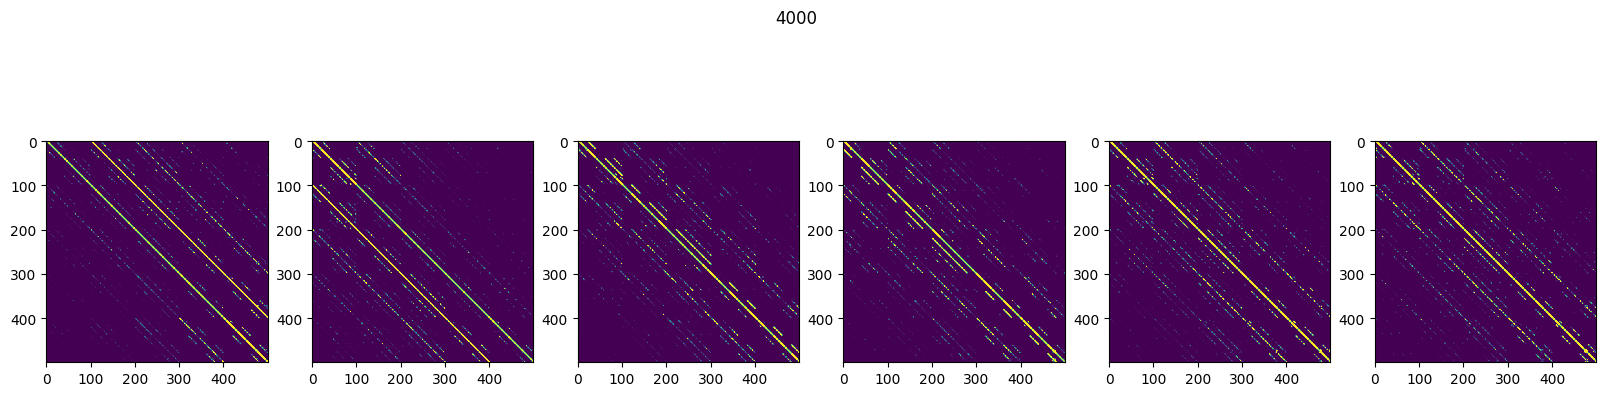

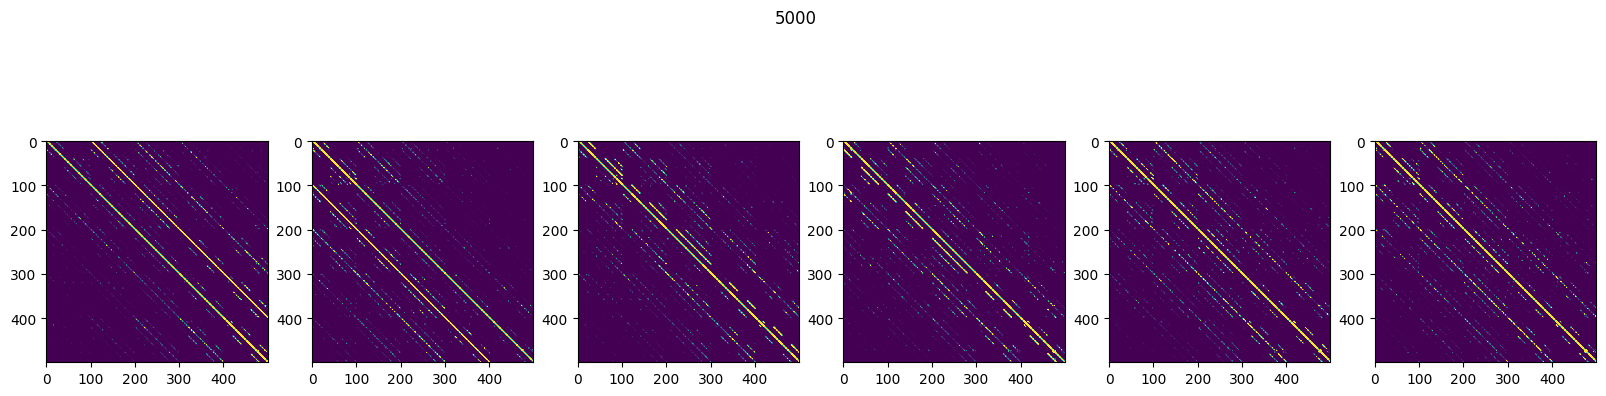

In [ ]:
#M.shape
#np.sum(M[0])

#plt.imshow(M[0], vmin=0,vmax=0.1)
#plt.colorbar()

#if True:
#    fig,ax=plt.subplots(1,6, figsize=(20,5))
#    ax[0].imshow(M[0], vmax=0.0001)
#    ax[1].imshow(M[1], vmax=0.0001)
#    ax[2].imshow(M[2], vmax=0.0001)
#    ax[3].imshow(M[3], vmax=0.0001)
#    ax[4].imshow(M[4], vmax=0.0001)
#    ax[5].imshow(M[5], vmax=0.0001)
#    plt.show()


for i in range(len(M_list)):
    fig,ax=plt.subplots(1,6, figsize=(20,5))
    ax[0].imshow(M_list[i][0], vmax=0.1)
    ax[1].imshow(M_list[i][1], vmax=0.1)
    ax[2].imshow(M_list[i][2], vmax=0.1)
    ax[3].imshow(M_list[i][3], vmax=0.1)
    ax[4].imshow(M_list[i][4], vmax=0.1)
    ax[5].imshow(M_list[i][5], vmax=0.1)
    plt.suptitle(i*1000)
    plt.show()

#выводить диф с предыдущим



In [ ]:
np.sum(M[2]>1)

400

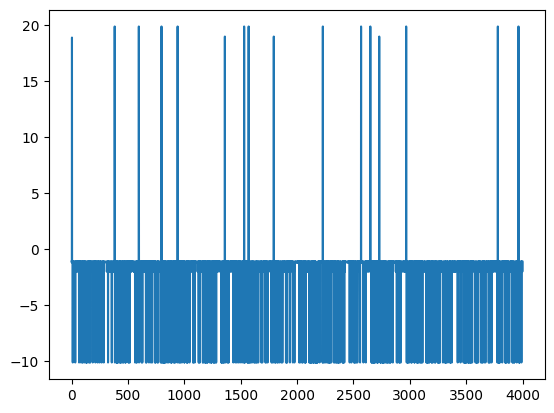

In [ ]:
plt.plot(mean_eval_returns)